["You've seen better kitchens, but at least this one seems pretty ordinary.", ' You see a fridge.', ' The fridge contains a red onion, a raw pork chop, a red hot pepper, a white onion, a carrot and an orange bell pepper.', ' You can see a closed oven.', ' You make out a table.', ' The table is massive.', ' On the table you can see a cookbook.', ' You can see a counter.', ' The counter is vast.', ' On the counter you can see a red apple, a raw yellow potato, a banana, a raw red potato, a yellow bell pepper, a raw purple potato and a knife.', ' Classic TextWorld.', ' You rest your hand against a wall, but you miss the wall and fall onto a stove.', ' The stove is conventional.', ' However, the stove, like an empty stove, has nothing on it.', ' Sometimes, just sometimes, TextWorld can just be the worst.']
[["You've", 'seen', 'better', 'kitchens,', 'but', 'at', 'least', 'this', 'one', 'seems', 'pretty', 'ordinary.'], ['You', 'see', 'a', 'fridge.'], ['The', 'fridge', 'contains', 'a', 'red', 

/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/home/karmi/.local/lib/python3.6/site-packages/ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


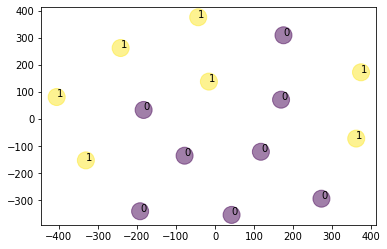

In [17]:
from gensim.models import Word2Vec
  
from nltk.cluster import KMeansClusterer
import nltk
import numpy as np 
  
from sklearn import cluster
from sklearn import metrics
  
# training data

description = "You've seen better kitchens, but at least this one seems pretty ordinary. You see a fridge. The fridge contains a red onion, a raw pork chop, a red hot pepper, a white onion, a carrot and an orange bell pepper. You can see a closed oven. You make out a table. The table is massive. On the table you can see a cookbook. You can see a counter. The counter is vast. On the counter you can see a red apple, a raw yellow potato, a banana, a raw red potato, a yellow bell pepper, a raw purple potato and a knife. Classic TextWorld. You rest your hand against a wall, but you miss the wall and fall onto a stove. The stove is conventional. However, the stove, like an empty stove, has nothing on it. Sometimes, just sometimes, TextWorld can just be the worst."

sentences = []
while description.find('.') != -1:
    index = description.find('.')
    sentences.append(description[:index+1])
    description = description[index+1:]

print(sentences)

word_matrix = []
for sentence in sentences:
    word_matrix.append(sentence.strip().split(' '))

print(word_matrix)
  
 
model = Word2Vec(word_matrix, min_count=1)
 
  
def sent_vectorizer(sent, model):
    sent_vec =[]
    numw = 0
    for w in sent:
        try:
            if numw == 0:
                sent_vec = model[w]
            else:
                sent_vec = np.add(sent_vec, model[w])
            numw+=1
        except:
            pass
     
    return np.asarray(sent_vec) / numw
  
  
X=[]
for sentence in word_matrix:
    X.append(sent_vectorizer(sentence, model))   
 
print ("========================")
#print (X)
 
 
  
 
# note with some version you would need use this (without wv) 
#  model[model.vocab] 
#print (model[model.wv.vocab])
 
 

#print(model.most_similar(positive=['kitchen'], negative=[], topn=2))
  
  
 
  
  
NUM_CLUSTERS=2

kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
print (assigned_clusters)
  
  
  
for index, sentence in enumerate(word_matrix):    
    print (str(assigned_clusters[index]) + ":" + str(sentence))
 
     
     
     
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
  
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
  
print ("Cluster id labels for inputted data")
print (labels)
print ("Centroids data")
print (centroids)
  
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))
  
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')
  
print ("Silhouette_score: ")
print (silhouette_score)

 
import matplotlib.pyplot as plt
 
from sklearn.manifold import TSNE
 
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
 
Y=model.fit_transform(X)
 
 
plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290,alpha=.5)

cluster0 = []
 
for j in range(len(word_matrix)):    
    plt.annotate(assigned_clusters[j],xy=(Y[j][0], Y[j][1]),xytext=(0,0),textcoords='offset points')
    print ("%s %s" % (assigned_clusters[j],  word_matrix[j]))
    if assigned_clusters[j] == 0:
        cluster0.append(word_matrix[j])
 
 
plt.show()

In [61]:
import spacy

nlp = spacy.load('en_core_web_lg')
#doc = nlp(description)
noun_list = []
verb_list = []

# cluster0 has all information with needed entitites for the game.
for idx, sentence in enumerate(cluster0):
    sentence = " ".join(sentence)
    doc = nlp(sentence)
    
    # verbs per sentence in a list(list)
    verb_sentence = []
    for token in doc:
        #print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_)
        if token.pos_ is "VERB":
            verb_sentence.append(token.lemma_)
    verb_list.append(verb_sentence)
    # can see -> see
    if 'can' in verb_sentence:
        verb_sentence.remove('can')
        
    print(" ")
    
    # nouns in a sentence
    noun_sentence = []
    for token in doc.noun_chunks:
            if token is not None:
                noun_sentence.append(token.text)
    if 'You' in noun_sentence:
        noun_sentence.remove('You')
    
    # short sentence are nouns without a, an, the, you.
    sentence_short = []
    for token in noun_sentence:
        if 'a' or 'an' or 'the' in token:
            token = str(token)
            token = token.split(' ', 1)
            if len(token) == 2:
                token = token[1]
                sentence_short.append(token)
    noun_list.append(sentence_short)
    
    for ent in doc.ents:
        print(ent.text, ent.start_char, ent.end_char, ent.label_)
    
    # some logs
    print(sentence)
    print(noun_list[idx])
    print(verb_list[idx])
 
                
# todo: nouns, und verben!

 
You see a fridge.
['fridge']
['see']
 
The fridge contains a red onion, a raw pork chop, a red hot pepper, a white onion, a carrot and an orange bell pepper.
['fridge', 'red onion', 'raw pork chop', 'red hot pepper', 'white onion', 'carrot', 'orange bell pepper']
['contain']
 
You can see a closed oven.
['closed oven']
['see']
 
You make out a table.
['table']
['make']
 
On the table you can see a cookbook.
['table', 'cookbook']
['see']
 
You can see a counter.
['counter']
['see']
 
On the counter you can see a red apple, a raw yellow potato, a banana, a raw red potato, a yellow bell pepper, a raw purple potato and a knife.
['counter', 'red apple', 'raw yellow potato', 'banana', 'raw red potato', 'yellow bell pepper', 'raw purple potato', 'knife']
['see']
 
You rest your hand against a wall, but you miss the wall and fall onto a stove.
['hand', 'wall', 'wall', 'stove']
['rest', 'miss', 'fall']


In [107]:
"""
Evaluation:

noun >= 2:
1. Nomen -> Möbel/Gerät
2. Nomen -> Lebensmittel
n. Nomen -> Lebensmittel/Gerät bsp. knife

['chop {f} with {o}', 
 'close {c}', 'close {d}', 
 'cook {f} with {oven}', 'cook {f} with {stove}', 'cook {f} with {toaster}', 
 'dice {f} with {o}',
 'drink {f}',
 'drop {o}', 'eat {f}',
 'examine {o}', 'examine {t}',
 'go east', 'go north', 'go south', 'go west',
 'insert {o} into {c}',
 'inventory',
 'lock {c} with {k}', 'lock {d} with {k}', 
 'look', 
 'open {c}', 'open {d}', 
 'prepare meal', 
 'put {o} on {s}', 
 'slice {f} with {o}',
 'take {o}', 'take {o} from {c}', 'take {o} from {s}',
 'unlock {c} with {k}', 'unlock {d} with {k}']

"""


import nltk
from nltk.corpus import wordnet 
nltk.download('wordnet')

print(noun_list[1])
for sentence in noun_list:
    print("new sentence\n")
    for word in sentence:

        split_str = word.split()  # split string into words

        print(split_str[-1]) # last word of string
        print(" ")
        syn = wordnet.synsets(split_str[-1])[0] 

        print ("Synset name :  ", syn.name()) 
        
        hyper = lambda s: s.hypernyms()
        print ("\nSyns hypernyms : ", list(syn.closure(hyper)))
        
        print("\nHypernyms : ", sorted([lemma.name() for syn in syn.hypernyms() 
                                        for lemma in syn.lemmas()]))


       
        print(" ")
        print("------------------------------------------------------------")
        print(" ")
        
print("Similarity: \n")
w1 = wordnet.synset('carrot.n.01')
w2 = wordnet.synset('onion.n.01')
print("carrot - onion: ", w1.wup_similarity(w2)) # 0.74

w3 = wordnet.synset('fridge.n.01')
w4 = wordnet.synset('onion.n.01')
print("fridge - onion: ", w3.wup_similarity(w4)) # 0.35

w5 = wordnet.synset('fridge.n.01')
w6 = wordnet.synset('oven.n.01')
print("fridge - oven: ", w5.wup_similarity(w6)) # 0.8

w7 = wordnet.synset('chop.n.01')
w8 = wordnet.synset('onion.n.01')
print("chop - onion: ", w7.wup_similarity(w8)) # 0.24

w9 = wordnet.synset('knife.n.01')
w10 = wordnet.synset('oven.n.01')
print("knife - oven: ", w9.wup_similarity(w10)) # 0.42

print("\n lowest common hypernyms: \n")
print(wordnet.synset('fridge.n.01').lowest_common_hypernyms(wordnet.synset('oven.n.01')))
print(wordnet.synset('carrot.n.01').lowest_common_hypernyms(wordnet.synset('pork.n.01')))
print(wordnet.synset('carrot.n.01').lowest_common_hypernyms(wordnet.synset('onion.n.01')))
print(wordnet.synset('knife.n.01').lowest_common_hypernyms(wordnet.synset('fridge.n.01')))



['fridge', 'red onion', 'raw pork chop', 'red hot pepper', 'white onion', 'carrot', 'orange bell pepper']
new sentence

fridge
 
Synset name :   electric_refrigerator.n.01

Syns hypernyms :  [Synset('refrigerator.n.01'), Synset('white_goods.n.01'), Synset('home_appliance.n.01'), Synset('appliance.n.02'), Synset('durables.n.01'), Synset('consumer_goods.n.01'), Synset('commodity.n.01'), Synset('artifact.n.01'), Synset('whole.n.02'), Synset('object.n.01'), Synset('physical_entity.n.01'), Synset('entity.n.01')]

Hypernyms :  ['icebox', 'refrigerator']
 
------------------------------------------------------------
 
new sentence

fridge
 
Synset name :   electric_refrigerator.n.01

Syns hypernyms :  [Synset('refrigerator.n.01'), Synset('white_goods.n.01'), Synset('home_appliance.n.01'), Synset('appliance.n.02'), Synset('durables.n.01'), Synset('consumer_goods.n.01'), Synset('commodity.n.01'), Synset('artifact.n.01'), Synset('whole.n.02'), Synset('object.n.01'), Synset('physical_entity.n.01'

[nltk_data] Downloading package wordnet to /home/karmi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
import spacy

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = spacy.load("en_core_web_lg")

adm_obj = ['red apple', 'red onion', 'yellow potato', 
        'fridge', 'pepper', 'oven', 'table', 'cookbook', 'counter', 'knife', 'stove']
#adm_obj = ['the red apple', 'the red apple', 'the red onion', 'the yellow potato', 'the yellow potato', 
#        'fridge', 'pepper', 'oven', 'table', 'cookbook', 'counter', 'knife', 'stove']

verbs = ['chop', 'close', 'cook', 'dice', 'drink', 'drop', 'eat', 'go', 'insert', 'inventory', 'lock', 
         'open', 'prepare', 'put', 'slice', 'take', 'unlock']

text = ' '.join(adm_obj)
verbtxt = ' '.join(verbs)

tokens = nlp(text)
vnlp = nlp(verbtxt)
cmd_dict = {}

for token1 in tokens:
    for token2 in tokens:
        if token1.similarity(token2) > 0.5 and token1.similarity(token2) != 1.0:
            print(token1.text, token2.text, token1.similarity(token2))

print("\n")
print("----------------------------------")
print("\n")
for token1 in tokens:
    verb_list = []
    if token1 not in cmd_dict.keys():
        cmd_dict.update( {token1 : verb_list} )
    for token2 in vnlp:
        if token1.similarity(token2) > 0.35 and token1.similarity(token2) != 1.0:
            verb_list.append(token2)
            print(token1.text, token2.text, token1.similarity(token2))

print("\n")

print("dict: ", cmd_dict)

print("\n") 
print("\n")
print("----------------------------------")
print("\n")
for token1 in vnlp:
    for token2 in vnlp:
        if token1.similarity(token2) > 0.5 and token1.similarity(token2) != 1.0:
            for key, value in cmd_dict.items():
                if token1 in value and token2 not in value:
                    value.append(token2)
            print(token1.text, token2.text, token1.similarity(token2))

print("\n")
print("dict: ", cmd_dict)

red yellow 0.8315851
red pepper 0.5004622
apple onion 0.51678896
apple potato 0.5463743
red yellow 0.8315851
red pepper 0.5004622
onion apple 0.51678896
onion potato 0.7614166
onion pepper 0.81193143
yellow red 0.8315851
yellow red 0.8315851
potato apple 0.5463743
potato onion 0.7614166
potato pepper 0.63269216
fridge oven 0.6792726
fridge stove 0.6424163
pepper red 0.5004622
pepper red 0.5004622
pepper onion 0.81193143
pepper potato 0.63269216
oven fridge 0.6792726
oven stove 0.7539638
stove fridge 0.6424163
stove oven 0.7539638


----------------------------------


red put 0.38235065
apple chop 0.36378068
apple cook 0.3521436
apple drink 0.38491035
apple eat 0.36805344
apple slice 0.4570546
red put 0.38235065
onion chop 0.6100581
onion cook 0.5580336
onion eat 0.3807194
onion slice 0.5581599
potato chop 0.5180296
potato cook 0.5679687
potato eat 0.48390326
potato slice 0.54627717
fridge cook 0.49038467
fridge drink 0.3997416
fridge eat 0.3961376
pepper chop 0.5553385
pepper cook 0.5